# FINAL PROJECT ITS365 by Abbie McDowell and Oona Kintscher

Goal: Predict NBA players win shares for their age 25 season based on their rookie years statistics.

## Import Libraries

In [7]:

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, VarianceThreshold
from sklearn.metrics import mean_absolute_error, r2_score

from keras.layers import Normalization, Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras import regularizers

from keras.callbacks import ModelCheckpoint
from keras import backend as K


## Import Data from .csv File

In [72]:

df = pd.read_csv(r'365finalproject.csv', encoding= 'unicode_escape')


In [73]:
df

,PlayerID,Player,Age,Games,Minutes,FGM,FGA,3PM,3PA,FTM,...,PF,PTS,FG%,3P%,FT%,MPG,PPG,RPG,APG,WS_25
0,duartch01,Chris Duarte,24,55,1541,268,621,94,255,90,...,95,720,0.432,0.369,0.804,28.0,13.1,4.1,2.1,0.0
1,marshna01,Naji Marshall,23,32,700,82,209,29,83,53,...,58,246,0.392,0.349,0.707,21.9,7.7,4.6,2.8,2.5
2,pritcpa01,Payton Pritchard,23,66,1268,184,418,102,248,40,...,104,510,0.440,0.411,0.889,19.2,7.7,2.4,1.8,0.6
3,windldy01,Dylan Windler,24,31,513,57,130,26,77,21,...,37,161,0.438,0.338,0.778,16.5,5.2,3.5,1.1,0.8
4,clarkbr01,Brandon Clarke,23,58,1300,296,479,23,64,85,...,100,700,0.618,0.359,0.759,22.4,12.1,5.9,1.4,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,kunneke01,Kevin Kunnert,22,64,701,105,215,0,0,21,...,151,231,0.488,0.000,0.636,11.0,3.6,3.4,0.7,4.1
1032,mcneila01,Larry McNeill,23,54,516,106,220,0,0,99,...,76,311,0.482,0.000,0.707,9.6,5.8,2.7,0.4,4.3
1033,ratleed01,Ed Ratleff,23,81,1773,254,585,0,0,103,...,182,611,0.434,0.000,0.798,21.9,7.5,3.5,2.2,4.5
1034,wattssl01,Slick Watts,22,62,1424,198,510,0,0,100,...,207,496,0.388,0.000,0.645,23.0,8.0,2.9,5.7,3.3


In [74]:
df

,PlayerID,Player,Age,Games,Minutes,FGM,FGA,3PM,3PA,FTM,...,PF,PTS,FG%,3P%,FT%,MPG,PPG,RPG,APG,WS_25
0,duartch01,Chris Duarte,24,55,1541,268,621,94,255,90,...,95,720,0.432,0.369,0.804,28.0,13.1,4.1,2.1,0.0
1,marshna01,Naji Marshall,23,32,700,82,209,29,83,53,...,58,246,0.392,0.349,0.707,21.9,7.7,4.6,2.8,2.5
2,pritcpa01,Payton Pritchard,23,66,1268,184,418,102,248,40,...,104,510,0.440,0.411,0.889,19.2,7.7,2.4,1.8,0.6
3,windldy01,Dylan Windler,24,31,513,57,130,26,77,21,...,37,161,0.438,0.338,0.778,16.5,5.2,3.5,1.1,0.8
4,clarkbr01,Brandon Clarke,23,58,1300,296,479,23,64,85,...,100,700,0.618,0.359,0.759,22.4,12.1,5.9,1.4,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,kunneke01,Kevin Kunnert,22,64,701,105,215,0,0,21,...,151,231,0.488,0.000,0.636,11.0,3.6,3.4,0.7,4.1
1032,mcneila01,Larry McNeill,23,54,516,106,220,0,0,99,...,76,311,0.482,0.000,0.707,9.6,5.8,2.7,0.4,4.3
1033,ratleed01,Ed Ratleff,23,81,1773,254,585,0,0,103,...,182,611,0.434,0.000,0.798,21.9,7.5,3.5,2.2,4.5
1034,wattssl01,Slick Watts,22,62,1424,198,510,0,0,100,...,207,496,0.388,0.000,0.645,23.0,8.0,2.9,5.7,3.3


In [75]:

names_ds = df[["PlayerID", "Player"]]
features_ds_raw = df.loc[:,'Age':'APG']
features_ds_raw = features_ds_raw.drop(["3PM", "3PA", "3P%"], axis=1)
labels_ds_raw = df[["WS_25"]]


In [76]:
names_ds

,PlayerID,Player
0,duartch01,Chris Duarte
1,marshna01,Naji Marshall
2,pritcpa01,Payton Pritchard
3,windldy01,Dylan Windler
4,clarkbr01,Brandon Clarke
...,...,...
1031,kunneke01,Kevin Kunnert
1032,mcneila01,Larry McNeill
1033,ratleed01,Ed Ratleff
1034,wattssl01,Slick Watts


In [77]:
features_ds_raw

,Age,Games,Minutes,FGM,FGA,FTM,FTA,ORB,TRB,AST,STL,BLK,PF,PTS,FG%,FT%,MPG,PPG,RPG,APG
0,24,55,1541,268,621,90,112,41,226,114,56,10,95,720,0.432,0.804,28.0,13.1,4.1,2.1
1,23,32,700,82,209,53,75,15,148,88,26,10,58,246,0.392,0.707,21.9,7.7,4.6,2.8
2,23,66,1268,184,418,40,45,33,158,120,37,9,104,510,0.440,0.889,19.2,7.7,2.4,1.8
3,24,31,513,57,130,21,27,20,107,33,19,12,37,161,0.438,0.778,16.5,5.2,3.5,1.1
4,23,58,1300,296,479,85,112,92,345,81,32,48,100,700,0.618,0.759,22.4,12.1,5.9,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,22,64,701,105,215,21,33,83,217,43,10,54,151,231,0.488,0.636,11.0,3.6,3.4,0.7
1032,23,54,516,106,220,99,140,60,146,24,35,6,76,311,0.482,0.707,9.6,5.8,2.7,0.4
1033,23,81,1773,254,585,103,129,93,286,181,90,27,182,611,0.434,0.798,21.9,7.5,3.5,2.2
1034,22,62,1424,198,510,100,155,72,182,351,115,13,207,496,0.388,0.645,23.0,8.0,2.9,5.7


In [78]:
labels_ds_raw

,WS_25
0,0.0
1,2.5
2,0.6
3,0.8
4,6.3
...,...
1031,4.1
1032,4.3
1033,4.5
1034,3.3


## Normalization of Feature Data

In [79]:

feature_normalization_layer = tf.keras.layers.Normalization(axis=-1)
feature_normalization_layer.adapt(features_ds_raw)


In [80]:

features_ds_normalized = feature_normalization_layer(features_ds_raw)


In [81]:
features_ds = np.array(features_ds_normalized)

In [82]:
features_ds

array([[ 1.587192  , -1.133756  ,  0.03314409, ...,  0.9669427 ,
         0.09333976,  0.11713215],
       [ 0.8004314 , -2.9718945 , -1.2081058 , ..., -0.21646269,
         0.3200158 ,  0.55341506],
       [ 0.8004314 , -0.2546463 , -0.36978245, ..., -0.21646269,
        -0.6773586 , -0.06984619],
       ...,
       [ 0.8004314 ,  0.94413966,  0.37555787, ..., -0.26029247,
        -0.17867143,  0.17945836],
       [ 0.01367071, -0.5743225 , -0.13953872, ..., -0.1507179 ,
        -0.4506826 ,  2.3608725 ],
       [ 0.8004314 , -0.33456534, -0.44653037, ..., -0.23837757,
         1.0000439 , -0.81775963]], dtype=float32)

## Normalization of Label Data

In [83]:
epsilon = 0.0001

In [84]:

labels_column_means = labels_ds_raw.mean(axis=0)
labels_column_std = labels_ds_raw.std(0) + epsilon


In [85]:
labels_column_means

WS_25    4.16583
dtype: float64

In [86]:
labels_column_std

WS_25    3.307225
dtype: float64

In [87]:

labels_ds_normalized = (labels_ds_raw - labels_column_means) / labels_column_std


In [90]:
labels_ds = np.array(labels_ds_normalized)

In [91]:
labels_ds

array([[-1.25961514],
       [-0.50369429],
       [-1.07819413],
       ...,
       [ 0.10104239],
       [-0.26179962],
       [-0.53393112]])

## K Fold Validation with 20Folds

In [303]:
from sklearn.model_selection import KFold

In [304]:
kf = KFold(n_splits=10)

In [305]:

mae_list = []
r2_list = []


In [306]:

best_r2 = -np.inf
best_weights = None


In [307]:
y = labels_ds

In [321]:
X = features_ds_pca_kmeans

In [322]:

model = Sequential()

model.add(Dense(units=1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.25))
    
model.add(Dense(units=1, activation='linear'))


In [323]:

callback = tf.keras.callbacks.EarlyStopping (
        monitor = 'mean_absolute_error',
        patience = 5,
        restore_best_weights = True
)


In [326]:

for train_index, test_index in kf.split(X):
    
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.00001), metrics=['mean_absolute_error'])
    
    model.fit(
        x_train, 
        y_train, 
        epochs=50, 
        callbacks = [callback], 
        validation_data=(x_test, y_test)
    )
    
    y_pred_normalized = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred_normalized)
    r2 = r2_score(y_test, y_pred_normalized)
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
    
    mae_list.append(mae)
    r2_list.append(r2)
    

Epoch 1/50
30/30 [==============================] - 2s 27ms/step - loss: 0.5618 - mean_absolute_error: 0.5192 - val_loss: 0.3655 - val_mean_absolute_error: 0.4076
Epoch 2/50
30/30 [==============================] - 1s 20ms/step - loss: 0.5716 - mean_absolute_error: 0.5329 - val_loss: 0.3669 - val_mean_absolute_error: 0.4094
Epoch 3/50
30/30 [==============================] - 1s 20ms/step - loss: 0.5496 - mean_absolute_error: 0.5198 - val_loss: 0.3671 - val_mean_absolute_error: 0.4095
Epoch 4/50
30/30 [==============================] - 1s 26ms/step - loss: 0.5658 - mean_absolute_error: 0.5278 - val_loss: 0.3678 - val_mean_absolute_error: 0.4105
Epoch 5/50
30/30 [==============================] - 1s 31ms/step - loss: 0.5718 - mean_absolute_error: 0.5374 - val_loss: 0.3682 - val_mean_absolute_error: 0.4108
Epoch 6/50
4/4 [==============================] - 0s 8ms/step
Epoch 1/50
30/30 [==============================] - 3s 39ms/step - loss: 0.5453 - mean_absolute_error: 0.5134 - val_loss: 0

Epoch 2/50
30/30 [==============================] - 1s 29ms/step - loss: 0.5420 - mean_absolute_error: 0.5199 - val_loss: 0.5649 - val_mean_absolute_error: 0.4897
Epoch 3/50
30/30 [==============================] - 1s 29ms/step - loss: 0.5555 - mean_absolute_error: 0.5265 - val_loss: 0.5642 - val_mean_absolute_error: 0.4897
Epoch 4/50
30/30 [==============================] - 1s 31ms/step - loss: 0.5561 - mean_absolute_error: 0.5240 - val_loss: 0.5659 - val_mean_absolute_error: 0.4899
Epoch 5/50
30/30 [==============================] - 1s 31ms/step - loss: 0.5398 - mean_absolute_error: 0.5113 - val_loss: 0.5665 - val_mean_absolute_error: 0.4903
Epoch 6/50
30/30 [==============================] - 1s 30ms/step - loss: 0.5523 - mean_absolute_error: 0.5218 - val_loss: 0.5669 - val_mean_absolute_error: 0.4902
Epoch 7/50
30/30 [==============================] - 1s 31ms/step - loss: 0.5575 - mean_absolute_error: 0.5257 - val_loss: 0.5680 - val_mean_absolute_error: 0.4909
Epoch 8/50
30/30 [====

30/30 [==============================] - 1s 30ms/step - loss: 0.5551 - mean_absolute_error: 0.5297 - val_loss: 0.5340 - val_mean_absolute_error: 0.4914
Epoch 12/50
30/30 [==============================] - 1s 33ms/step - loss: 0.5443 - mean_absolute_error: 0.5149 - val_loss: 0.5344 - val_mean_absolute_error: 0.4918
Epoch 13/50
30/30 [==============================] - 1s 28ms/step - loss: 0.5453 - mean_absolute_error: 0.5166 - val_loss: 0.5341 - val_mean_absolute_error: 0.4916
Epoch 14/50
30/30 [==============================] - 1s 31ms/step - loss: 0.5200 - mean_absolute_error: 0.5064 - val_loss: 0.5320 - val_mean_absolute_error: 0.4903
Epoch 15/50
30/30 [==============================] - 1s 33ms/step - loss: 0.5442 - mean_absolute_error: 0.5171 - val_loss: 0.5314 - val_mean_absolute_error: 0.4899
Epoch 16/50
30/30 [==============================] - 1s 32ms/step - loss: 0.5537 - mean_absolute_error: 0.5231 - val_loss: 0.5290 - val_mean_absolute_error: 0.4883
Epoch 17/50
30/30 [=========

In [327]:
print("done")

done


In [328]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 1024)              22528     
                                                                 
 dropout_40 (Dropout)        (None, 1024)              0         
                                                                 
 dense_51 (Dense)            (None, 512)               524800    
                                                                 
 dropout_41 (Dropout)        (None, 512)               0         
                                                                 
 dense_52 (Dense)            (None, 256)               131328    
                                                                 
 dropout_42 (Dropout)        (None, 256)               0         
                                                                 
 dense_53 (Dense)            (None, 128)             

In [329]:
mean_mae = np.mean(mae_list)
print("Mean MAE:", mean_mae)
mean_r2 = np.mean(r2_list)
print("Mean R2:", mean_r2)

Mean MAE: 0.48655058431425857
Mean R2: 0.605221077279835


In [330]:
best_r2 = np.max(r2_list)
best_mae = np.min(mae_list)
print("Best MAE:", best_mae)
print("Best R2:", best_r2)

Best MAE: 0.4076170072231297
Best R2: 0.6907780639701488


In [331]:
best_model.save_weights('Model-0.69.h5')

In [332]:
n_train1, n_test1, x_train1, x_test1, y_train1, y_test1 = train_test_split(names_ds, X, y, test_size=0.3)


In [325]:
model.load_weights('Model-0.68.h5') ## 5th run was the best

### R2 on entire dataset

In [336]:
model.evaluate(X, y)

33/33 [==============================] - 0s 8ms/step - loss: 0.4865 - mean_absolute_error: 0.4805


[0.4864974915981293, 0.4804537296295166]

In [337]:
y_pred1 = model.predict(X)

33/33 [==============================] - 0s 7ms/step


In [338]:
r2_score1 = r2_score(y, y_pred1)
print(r2_score1)

0.6326765350544317


## Split Data into Training and Testing Datasets

In [ ]:

##n_train, n_test, x_train, x_test, y_train, y_test = train_test_split(names_ds, features_ds, labels_ds, test_size=0.3)


In [ ]:

##n_train


In [ ]:
##x_train

In [ ]:
##y_train

In [ ]:
##n_test

In [ ]:
##x_test

In [ ]:
##y_test

In [ ]:

NUM_FEATURES = x_train.shape[1]
print(NUM_FEATURES)


# Data Visualization 

## Histogram

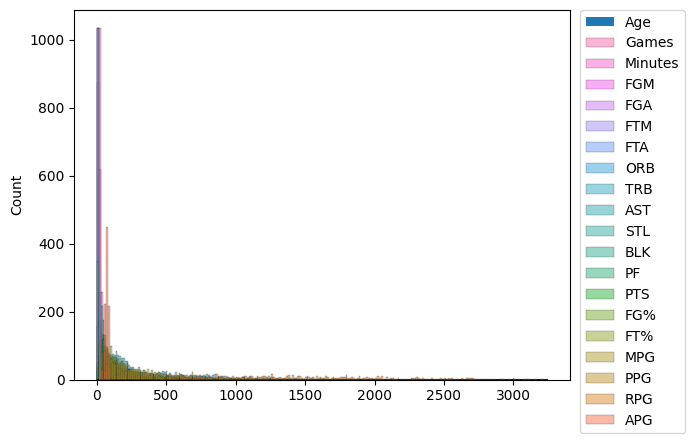

In [179]:
sb.histplot(data=features_ds_raw)
plt.legend(features_ds_raw.head(), bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

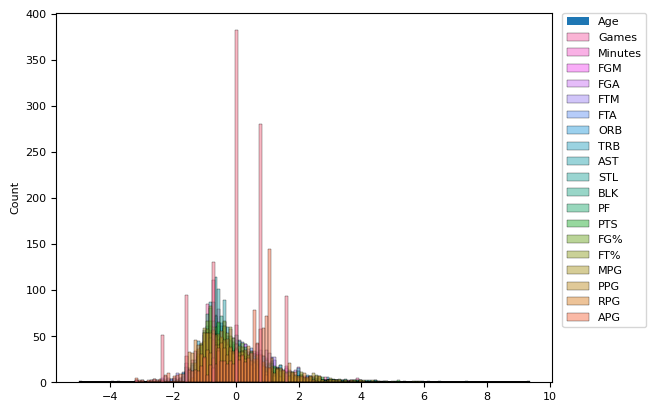

In [283]:
sb.histplot(data=features_ds)
plt.legend(features_ds_raw.head(), bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

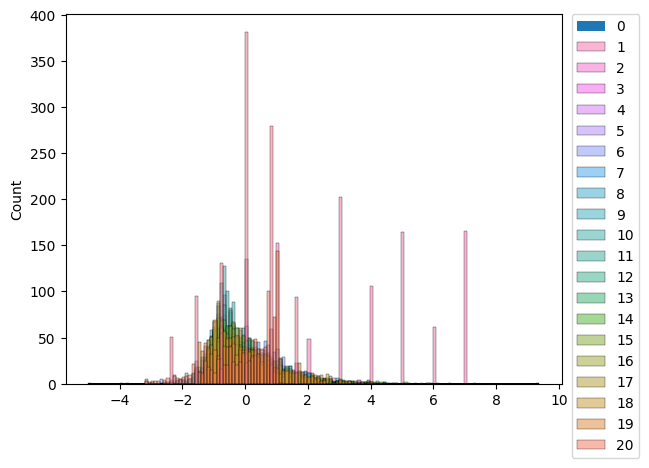

In [177]:
sb.histplot(data=features_ds_K_Means)
plt.legend(np.arange(features_ds_K_Means.shape[1]), bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

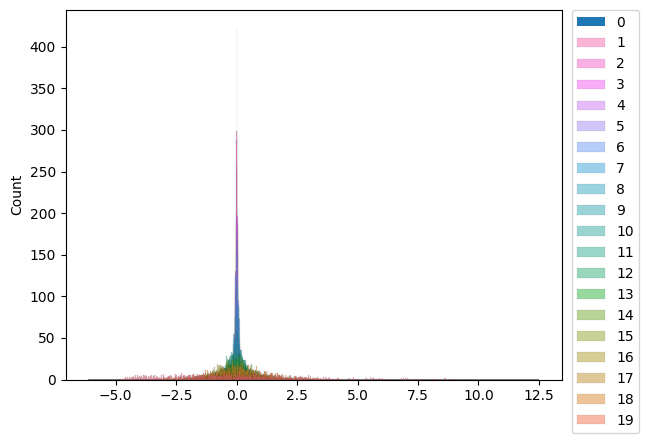

In [176]:
sb.histplot(data=features_ds_pca)
plt.legend(np.arange(features_ds_pca.shape[1]), bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Boxplot

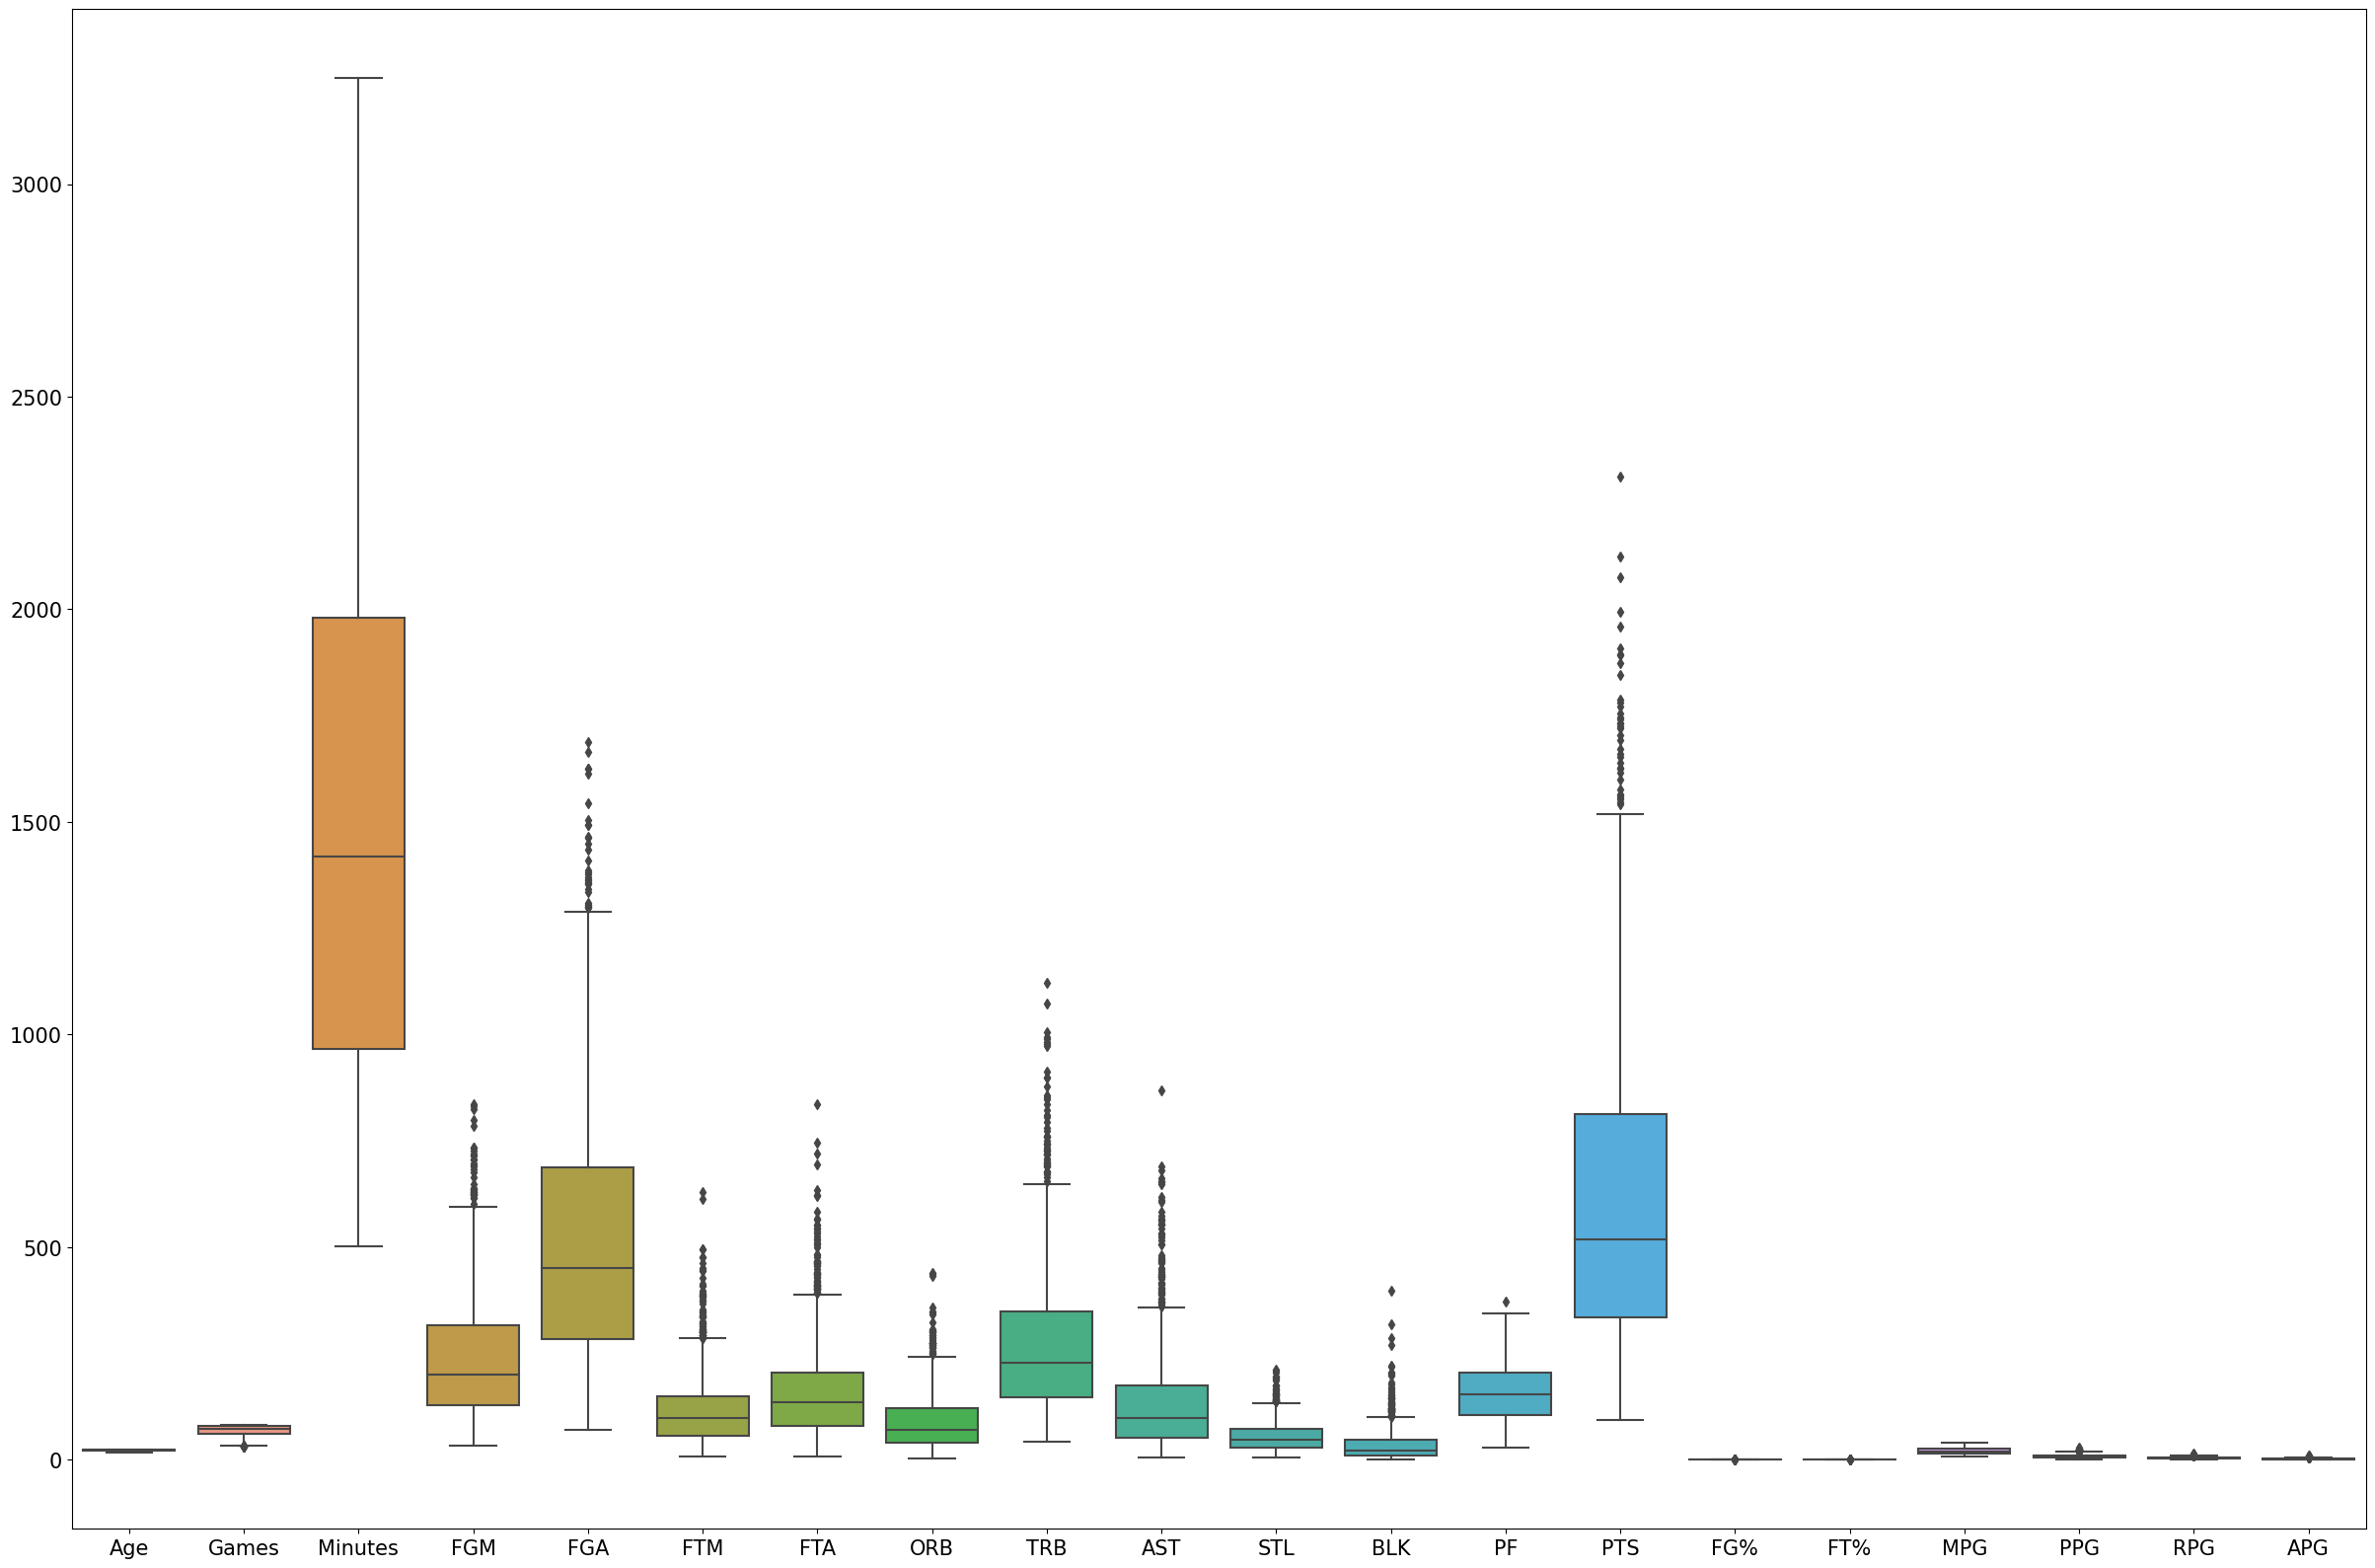

In [193]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(30, 20))
sb.boxplot(data=features_ds_raw, ax=ax)
plt.show()

## Correlation Matrix

In [189]:

C_mat = features_ds_raw.corr()
C_mat


,Age,Games,Minutes,FGM,FGA,FTM,FTA,ORB,TRB,AST,STL,BLK,PF,PTS,FG%,FT%,MPG,PPG,RPG,APG
Age,1.000000,-0.062249,-0.152536,-0.123242,-0.140463,-0.141720,-0.147762,-0.082837,-0.123743,-0.045099,-0.056911,-0.102057,-0.030437,-0.140904,0.039299,0.014986,-0.163539,-0.146659,-0.120261,-0.041786
Games,-0.062249,1.000000,0.674487,0.555424,0.554319,0.490012,0.495012,0.431727,0.479533,0.384131,0.499314,0.253327,0.665157,0.554495,0.101022,0.098656,0.374167,0.343112,0.249586,0.216362
Minutes,-0.152536,0.674487,1.000000,0.900375,0.908371,0.790802,0.786518,0.577279,0.689338,0.623696,0.726616,0.365888,0.741768,0.907861,0.097158,0.180426,0.927644,0.834288,0.573075,0.537484
FGM,-0.123242,0.555424,0.900375,1.000000,0.983146,0.851666,0.846672,0.590782,0.673320,0.526365,0.636805,0.353319,0.677102,0.990973,0.194617,0.192742,0.849334,0.950991,0.582802,0.452455
FGA,-0.140463,0.554319,0.908371,0.983146,1.000000,0.828008,0.813773,0.514228,0.608852,0.578234,0.664700,0.284694,0.640765,0.980523,0.043857,0.238780,0.863338,0.943671,0.514098,0.508944
FTM,-0.141720,0.490012,0.790802,0.851666,0.828008,1.000000,0.983242,0.604789,0.662501,0.459459,0.565000,0.392541,0.637268,0.898497,0.195483,0.218505,0.742059,0.862918,0.583954,0.396505
FTA,-0.147762,0.495012,0.786518,0.846672,0.813773,0.983242,1.000000,0.673207,0.719734,0.419038,0.547406,0.456726,0.672189,0.885943,0.244001,0.074302,0.733806,0.846603,0.645331,0.352612
ORB,-0.082837,0.431727,0.577279,0.590782,0.514228,0.604789,0.673207,1.000000,0.936429,-0.006978,0.265827,0.641028,0.708968,0.574732,0.444170,-0.222753,0.501866,0.513447,0.899424,-0.084393
TRB,-0.123743,0.479533,0.689338,0.673320,0.608852,0.662501,0.719734,0.936429,1.000000,0.099686,0.327281,0.678160,0.743370,0.664869,0.387828,-0.146872,0.621759,0.604043,0.957791,0.022479
AST,-0.045099,0.384131,0.623696,0.526365,0.578234,0.459459,0.419038,-0.006978,0.099686,1.000000,0.766753,-0.112088,0.317483,0.539690,-0.165241,0.286275,0.599178,0.505553,0.010220,0.972715


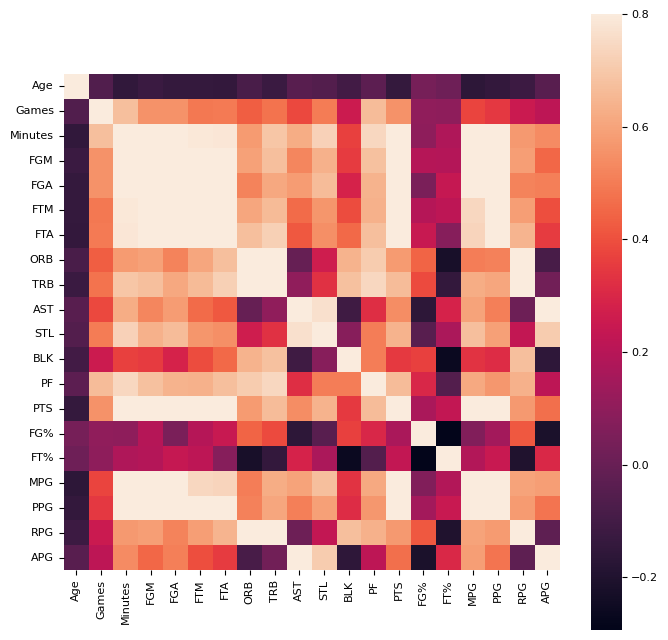

In [285]:

plt.rcParams.update({'font.size': 8})
fig = plt.figure(figsize = (8,8))
sb.heatmap(C_mat, vmax=.8, square=True)
plt.show()


## Filter Feature Selection Techniques

### Univariate Feature Selection

In [157]:

f_val, p_val = f_regression(features_ds, np.array(labels_ds).ravel())


In [158]:
f_val

array([107.76109435,  57.88265829, 208.58555621, 229.7839897 ,
       192.35032403, 312.27419521, 310.97113402, 147.07502992,
       190.42648542,  77.14802231, 129.06983479,  89.24080307,
        84.48047485, 259.26690469,  41.44439173,   8.20074196,
       203.37707755, 255.21148385, 167.99082705,  63.43587934])

In [159]:
p_val

array([4.40470974e-24, 6.24224143e-14, 3.31484228e-43, 5.07154740e-47,
       3.07614413e-40, 2.85485629e-61, 4.71742197e-61, 9.63169031e-32,
       6.95560691e-40, 6.47720592e-18, 2.86809462e-28, 2.25136017e-20,
       2.07374396e-19, 3.20794584e-52, 1.85304175e-10, 4.27195169e-03,
       2.93845604e-42, 1.63730515e-51, 1.04126615e-35, 4.34619143e-15])

In [160]:

feature_dictonary={'features':features_ds_raw.columns.tolist(), 'f_scores':f_val.tolist()}
features_f_score= pd.DataFrame(feature_dictonary).sort_values(by='f_scores', ascending=False).reset_index(drop=True)


In [161]:
features_f_score

,features,f_scores
0,FTM,312.274195
1,FTA,310.971134
2,PTS,259.266905
3,PPG,255.211484
4,FGM,229.783990
5,Minutes,208.585556
6,MPG,203.377078
7,FGA,192.350324
8,TRB,190.426485
9,RPG,167.990827


### Variance Threshold

In [ ]:

variance_filter = VarianceThreshold(threshold=0.25)
features_variance_selected = variance_filter.fit_transform(features_ds_raw)


In [ ]:
pd.DataFrame(features_variance_selected)

## Principal Component Analysis

In [152]:
from sklearn.decomposition import PCA

In [153]:
pca_model = PCA()

In [154]:
pca_model.fit(features_ds)

PCA()

In [155]:
features_ds_pca = pca_model.transform(features_ds)

In [156]:
pd.DataFrame(features_ds_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.292134,-1.257798,-0.707501,-1.869496,1.177831,0.822886,0.089581,-0.574167,0.762674,0.344767,-0.210416,-0.312725,0.262175,0.281941,0.023277,-0.140330,0.026398,-0.086339,-0.027676,-0.024713
1,-3.327180,-0.757063,-1.204306,-0.415835,2.399911,1.717979,-0.156369,-0.177034,-0.333082,-0.166262,0.257170,-0.175745,0.384300,0.161141,0.093361,0.114670,-0.033822,0.139177,0.097603,0.020054
2,-2.015606,-1.362153,-0.405446,-1.433654,-0.467715,0.061849,-0.941400,-0.417769,0.592103,-0.012417,-0.298907,0.058895,0.036770,0.066277,0.038942,-0.115642,0.097798,-0.025997,0.074460,-0.040713
3,-4.596894,-0.145407,-0.969570,-1.644120,1.998151,1.010000,-0.636268,-0.196166,-0.066107,0.347687,0.055709,-0.046553,0.124933,-0.300156,-0.063901,0.008944,0.077846,0.047546,0.057027,-0.015374
4,-0.049892,1.643681,-0.343754,-1.483563,1.923791,-1.813028,-1.181992,-0.583150,1.041105,0.060921,-0.775561,0.043405,0.367791,0.211550,-0.012893,-0.105319,0.023094,0.008346,-0.004242,0.040277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,-3.179523,1.807039,0.546411,0.404087,0.054136,-0.250871,-0.225722,0.239025,0.294486,-0.461221,0.055090,0.583488,-0.024619,-0.018336,-0.049239,0.009372,-0.107070,-0.003852,0.028336,0.000166
1032,-3.357408,0.636947,-0.259547,-1.023044,0.701822,-0.669717,0.327507,0.246211,-0.920763,0.521672,-0.149619,0.217559,0.125018,-0.079194,-0.044589,-0.069223,0.037971,-0.083109,0.034924,0.066822
1033,0.475405,-0.951874,1.057638,-0.566269,-0.912363,0.382992,-0.458896,-0.299393,0.093178,0.560132,-0.148677,0.032868,0.021519,-0.021933,-0.029983,0.072934,0.009080,-0.007498,-0.040534,0.011361
1034,0.281951,-2.579041,1.511082,1.600706,1.212078,1.070659,-0.014405,0.085989,-0.765637,0.081333,0.780976,0.645499,-0.155930,0.169430,0.200307,0.137249,-0.056131,-0.002074,0.065931,0.025794


## K-Means Clustering

In [92]:
from sklearn.cluster import KMeans

In [198]:
k_means_model = KMeans(n_init='auto')

In [199]:
k_means_model.fit(features_ds)

C:\Users\oonak\Anaconda3\envs\ITS365\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_init='auto')

In [200]:
features_ds_group = k_means_model.predict(features_ds)

In [201]:
features_ds_group = features_ds_group.reshape(features_ds_group.size,1)

In [202]:
features_ds_group.shape

(1036, 1)

In [203]:
features_ds.shape

(1036, 20)

In [204]:
features_ds_K_Means = np.concatenate((features_ds, features_ds_group), axis=-1)

In [205]:
pd.DataFrame(features_ds_K_Means)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.587192,-1.133756,0.033144,0.185949,0.301294,-0.327468,-0.445468,-0.733264,-0.279039,-0.182255,...,-0.626633,-0.957988,0.261620,-0.450921,0.951292,0.868568,0.966943,0.093340,0.117132,6.0
1,0.800431,-2.971895,-1.208106,-1.071918,-1.019095,-0.751425,-0.763925,-1.119656,-0.712215,-0.392760,...,-0.626633,-1.512201,-0.986292,-1.233555,-0.139663,0.061195,-0.216463,0.320016,0.553415,3.0
2,0.800431,-0.254646,-0.369782,-0.382120,-0.349286,-0.900383,-1.022133,-0.852154,-0.656680,-0.133676,...,-0.652456,-0.823179,-0.291252,-0.294395,1.907283,-0.296166,-0.216463,-0.677359,-0.069846,3.0
3,1.587192,-3.051814,-1.484103,-1.240986,-1.272277,-1.118090,-1.177058,-1.045350,-0.939910,-0.838061,...,-0.574986,-1.826754,-1.210074,-0.333526,0.658871,-0.653528,-0.764336,-0.178671,-0.506129,3.0
4,0.800431,-0.893999,-0.322553,0.375305,-0.153792,-0.384760,-0.445468,0.024659,0.381833,-0.449435,...,0.354643,-0.883094,0.208966,3.188325,0.445179,0.127374,0.747794,0.909374,-0.319151,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,0.013671,-0.414484,-1.206630,-0.916375,-0.999866,-1.118090,-1.125417,-0.109092,-0.329021,-0.757097,...,0.509581,-0.119179,-1.025783,0.644766,-0.938197,-1.381486,-1.114974,-0.224007,-0.755434,1.0
1032,0.800431,-1.213675,-1.479675,-0.909612,-0.983842,-0.224344,-0.204473,-0.450901,-0.723322,-0.910929,...,-0.729925,-1.242584,-0.815165,0.527371,-0.139663,-1.566785,-0.632846,-0.541353,-0.942412,1.0
1033,0.800431,0.944140,0.375558,0.091271,0.185920,-0.178510,-0.299150,0.039520,0.054174,0.360203,...,-0.187641,0.345161,-0.025347,-0.411790,0.883810,0.061195,-0.260292,-0.178671,0.179458,6.0
1034,0.013671,-0.574323,-0.139539,-0.287442,-0.054442,-0.212885,-0.075369,-0.272566,-0.523395,1.736588,...,-0.549163,0.719630,-0.328110,-1.311818,-0.836975,0.206787,-0.150718,-0.450683,2.360873,0.0


In [206]:
features_ds_pca_kmeans = np.concatenate((features_ds_pca, features_ds_group), axis=-1)

In [207]:
pd.DataFrame(features_ds_pca_kmeans)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.292134,-1.257798,-0.707501,-1.869496,1.177831,0.822886,0.089581,-0.574167,0.762674,0.344767,...,-0.312725,0.262175,0.281941,0.023277,-0.140330,0.026398,-0.086339,-0.027676,-0.024713,6.0
1,-3.327180,-0.757063,-1.204306,-0.415835,2.399911,1.717979,-0.156369,-0.177034,-0.333082,-0.166262,...,-0.175745,0.384300,0.161141,0.093361,0.114670,-0.033822,0.139177,0.097603,0.020054,3.0
2,-2.015606,-1.362153,-0.405446,-1.433654,-0.467715,0.061849,-0.941400,-0.417769,0.592103,-0.012417,...,0.058895,0.036770,0.066277,0.038942,-0.115642,0.097798,-0.025997,0.074460,-0.040713,3.0
3,-4.596894,-0.145407,-0.969570,-1.644120,1.998151,1.010000,-0.636268,-0.196166,-0.066107,0.347687,...,-0.046553,0.124933,-0.300156,-0.063901,0.008944,0.077846,0.047546,0.057027,-0.015374,3.0
4,-0.049892,1.643681,-0.343754,-1.483563,1.923791,-1.813028,-1.181992,-0.583150,1.041105,0.060921,...,0.043405,0.367791,0.211550,-0.012893,-0.105319,0.023094,0.008346,-0.004242,0.040277,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,-3.179523,1.807039,0.546411,0.404087,0.054136,-0.250871,-0.225722,0.239025,0.294486,-0.461221,...,0.583488,-0.024619,-0.018336,-0.049239,0.009372,-0.107070,-0.003852,0.028336,0.000166,1.0
1032,-3.357408,0.636947,-0.259547,-1.023044,0.701822,-0.669717,0.327507,0.246211,-0.920763,0.521672,...,0.217559,0.125018,-0.079194,-0.044589,-0.069223,0.037971,-0.083109,0.034924,0.066822,1.0
1033,0.475405,-0.951874,1.057638,-0.566269,-0.912363,0.382992,-0.458896,-0.299393,0.093178,0.560132,...,0.032868,0.021519,-0.021933,-0.029983,0.072934,0.009080,-0.007498,-0.040534,0.011361,6.0
1034,0.281951,-2.579041,1.511082,1.600706,1.212078,1.070659,-0.014405,0.085989,-0.765637,0.081333,...,0.645499,-0.155930,0.169430,0.200307,0.137249,-0.056131,-0.002074,0.065931,0.025794,0.0


In [260]:
features_ds_all = np.concatenate((features_ds, features_ds_pca, features_ds_group), axis=-1)

In [261]:
pd.DataFrame(features_ds_all)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.587192,-1.133756,0.033144,0.185949,0.301294,-0.327468,-0.445468,-0.733264,-0.279039,-0.182255,...,-0.312725,0.262175,0.281941,0.023277,-0.140330,0.026398,-0.086339,-0.027676,-0.024713,6.0
1,0.800431,-2.971895,-1.208106,-1.071918,-1.019095,-0.751425,-0.763925,-1.119656,-0.712215,-0.392760,...,-0.175745,0.384300,0.161141,0.093361,0.114670,-0.033822,0.139177,0.097603,0.020054,3.0
2,0.800431,-0.254646,-0.369782,-0.382120,-0.349286,-0.900383,-1.022133,-0.852154,-0.656680,-0.133676,...,0.058895,0.036770,0.066277,0.038942,-0.115642,0.097798,-0.025997,0.074460,-0.040713,3.0
3,1.587192,-3.051814,-1.484103,-1.240986,-1.272277,-1.118090,-1.177058,-1.045350,-0.939910,-0.838061,...,-0.046553,0.124933,-0.300156,-0.063901,0.008944,0.077846,0.047546,0.057027,-0.015374,3.0
4,0.800431,-0.893999,-0.322553,0.375305,-0.153792,-0.384760,-0.445468,0.024659,0.381833,-0.449435,...,0.043405,0.367791,0.211550,-0.012893,-0.105319,0.023094,0.008346,-0.004242,0.040277,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,0.013671,-0.414484,-1.206630,-0.916375,-0.999866,-1.118090,-1.125417,-0.109092,-0.329021,-0.757097,...,0.583488,-0.024619,-0.018336,-0.049239,0.009372,-0.107070,-0.003852,0.028336,0.000166,1.0
1032,0.800431,-1.213675,-1.479675,-0.909612,-0.983842,-0.224344,-0.204473,-0.450901,-0.723322,-0.910929,...,0.217559,0.125018,-0.079194,-0.044589,-0.069223,0.037971,-0.083109,0.034924,0.066822,1.0
1033,0.800431,0.944140,0.375558,0.091271,0.185920,-0.178510,-0.299150,0.039520,0.054174,0.360203,...,0.032868,0.021519,-0.021933,-0.029983,0.072934,0.009080,-0.007498,-0.040534,0.011361,6.0
1034,0.013671,-0.574323,-0.139539,-0.287442,-0.054442,-0.212885,-0.075369,-0.272566,-0.523395,1.736588,...,0.645499,-0.155930,0.169430,0.200307,0.137249,-0.056131,-0.002074,0.065931,0.025794,0.0


## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mean_abs_error = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Absolute Error:", mean_abs_error)
print("R-squared:", r2)

## DNN Architecture

In [241]:
input_layer = tf.keras.layers.Input(shape=(NUM_FEATURES))

x = tf.keras.layers.Dense(units=1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(input_layer)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(units=512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(units=256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.25)(x)
x = tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.25)(x)

output_layer = tf.keras.layers.Dense(units=1, activation='linear')(x)

Model = tf.keras.Model(input_layer, output_layer)


NameError: name 'NUM_FEATURES' is not defined

In [ ]:
Model.summary()

## Training Process

In [ ]:

callback = tf.keras.callbacks.EarlyStopping (
    monitor = 'mean_absolute_error',
    patience = 5,
    restore_best_weights = True
)


In [ ]:

Model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.005), metrics=['mean_absolute_error'])


Model.load_weights("Model-02-004.h5")

In [ ]:

history = Model.fit (
    x_train, 
    y_train,
    validation_data = (x_test, y_test),
    epochs = 50,
    callbacks = [callback]
)


In [ ]:
Model.evaluate(x_test, y_test)

Model.save("FINAL-PROJECT-TRXX-TEXX.h5")

# Result Interpretation & Evaluation 

In [ ]:

plt.plot(history.history['mean_absolute_error']) 
plt.plot(history.history['val_mean_absolute_error']) 
plt.legend(['Training Set', 'Testing Set'], loc='upper left')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Model MAE')
plt.show()


In [ ]:
preds = Model.predict(x_test)

## Correlation Coefficient

In [ ]:
r2 = r2_score(y_test, preds)

In [ ]:
r2